# House prices prediction

TL;DR

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import FunctionTransformer

In [3]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Cleansing

In [5]:

pd.set_option('display.max_rows', None)
train_data.dtypes.to_frame()

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [6]:
# description of our dataset
#T refers to transpose that displays in long format
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


First off, we'll check for some missing values in the data

In [7]:
def summarize_missing_values(df):
    """
    This function takes a DataFrame as input and returns a summary DataFrame
    that includes the column index, column names, the count of missing values,
    the percentage of missing values, and the data type for each column, but
    only for columns that have missing values. The summary is sorted by the 
    count of missing values in descending order.
    """
    summary = []
    for idx, col in enumerate(df.columns):
        # Calculate total and percentage missing
        total_missing = df[col].isna().sum()
        if total_missing > 0:
            percent_missing = df[col].isna().mean() * 100
            dtype = df[col].dtype
            summary.append([idx, col, total_missing, percent_missing, dtype])

    # Create a DataFrame from the summary list
    summary_df = pd.DataFrame(summary, columns=['Index', 'Column', 'Missing Values', 'Percentage Missing', 'Dtype'])

    # Sort the DataFrame by 'Missing Values' in descending order
    summary_df = summary_df.sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

    return summary_df

def plot_missing_values_summary(df):
    """
    This function takes a DataFrame with missing values summary and creates a 
    heatmap to visualize the percentage of missing values.
    """
    plt.figure(figsize=(20, 6))
    sns.heatmap(df[['Column', 'Percentage Missing']].set_index('Column').transpose(),
                cmap='viridis', annot=True, cbar_kws={'label': 'Percentage Missing'})
    plt.title('Missing Values Percentage by Column')
    plt.show()

## Handle Missing value on train data

    Index        Column  Missing Values  Percentage Missing    Dtype
0      72        PoolQC            1453           99.520548   object
1      74   MiscFeature            1406           96.301370   object
2       6         Alley            1369           93.767123   object
3      73         Fence            1179           80.753425   object
4      25    MasVnrType             872           59.726027   object
5      57   FireplaceQu             690           47.260274   object
6       3   LotFrontage             259           17.739726  float64
7      58    GarageType              81            5.547945   object
8      59   GarageYrBlt              81            5.547945  float64
9      60  GarageFinish              81            5.547945   object
10     63    GarageQual              81            5.547945   object
11     64    GarageCond              81            5.547945   object
12     35  BsmtFinType2              38            2.602740   object
13     32  BsmtExposure           

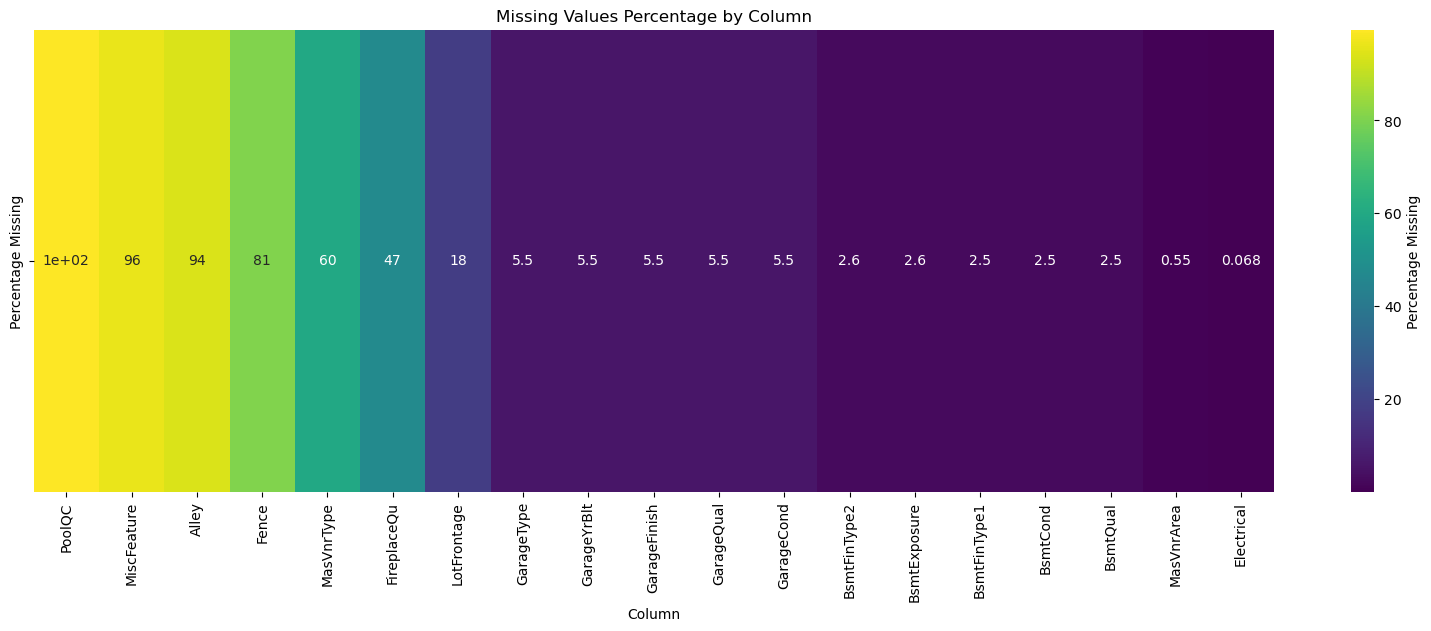

In [8]:
missing_summary = summarize_missing_values(train_data)
print(missing_summary)

plot_missing_values_summary(missing_summary)

Out of the 18 columns with missing values:<br>
Three are numerical features LotFrontage,MasVnrArea and GarageYrBlt<br>
And the rest are categorical features.

Now we can clearly see we have some missing values in the dataset and use that info for better prediction. Our goal is to make an accurate completion of the mising values for some features.

We noticed that the data isn't exactly filled the way it is described, and some categorical features that should have 'NA' are simply empty. 

In [9]:
print(train_data[train_data['MasVnrType'] == 'None'])
print(train_data[train_data['PoolQC'] == 'NA'])
print(train_data[train_data['Fence'] == 'NA'])
print(train_data[train_data['PoolQC'] == 'NA'])


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
Empty

We have to fill those manually

In [10]:

fill_features = ['MasVnrType','Alley','Fence','PoolQC']
for col in fill_features:
    train_data[col] = train_data[col].fillna('NA')



Filling train missing numerical data

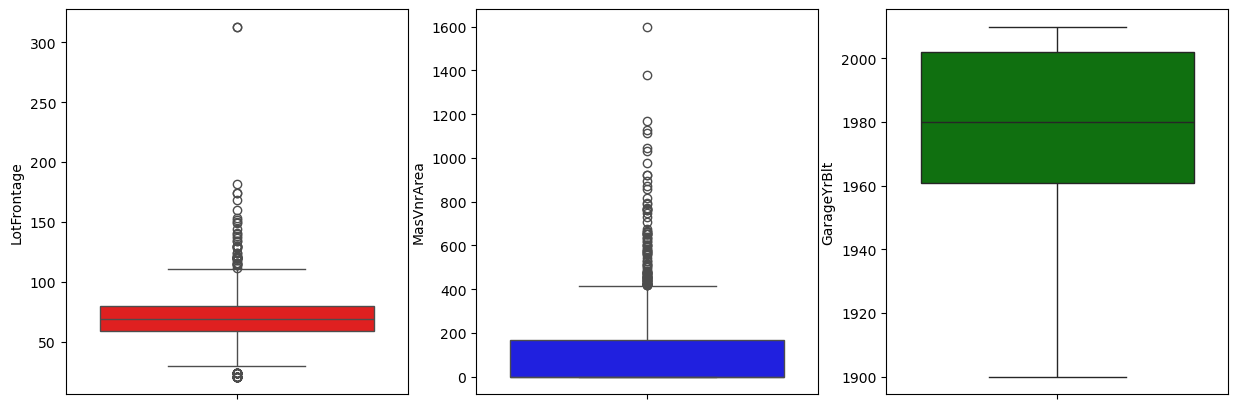

In [11]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.

plt.figure(figsize=(15,5))

numerical_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = train_data[numerical_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

There are outliers in those so we will fill them with median values.

In [12]:
#Fill train_data null with median value
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
train_data[numerical_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

Now let's examine categorical features

#### 1) Basement

In [13]:
Bsmt_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']
train_data[Bsmt_cols].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


In [14]:
train_data[train_data['BsmtQual'].isnull()][Bsmt_cols].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


We can infer from the above table , that the relevant data is missing because there is no basement in those houses.<br>
While houses that have basements also specify these features, 
We can't fill the missing values with mode values as it might damage the prediction.<br>
We'll fill the missing values with 'NA' instead.

In [15]:
#Fill basement with 'NA'
for col in Bsmt_cols:
    train_data[col] = train_data[col].fillna('NA')

#### 2) Garage

In [16]:
garage_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
train_data[garage_cols].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [17]:
train_data[train_data['GarageType'].isnull()][garage_cols].head()

,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN


We'll simply fill them with 'NA', the same we did with basement.


In [18]:
for col in garage_cols:
    train_data[col] = train_data[col].fillna('NA')

#### 3.FirePlace

In [19]:
train_data[train_data['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


We can see that the missing values are at those places , where number of fireplaces is zero.<br>
we will fill the missing values with 'NA'.

In [20]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('No Fireplace')

In [21]:
#We'll replace electrical with mode (there is only one missing value so mode is fine)
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

In [22]:
#Current Missing values count
print('Missing train values:', train_data.isna().sum().sum())

Missing train values: 1406


#### Feature Removal

In [23]:
train_data.drop('Id' , axis =1 , inplace = True)
train_data.drop('MiscFeature', axis =1, inplace = True)
print(f"Training missing values summary:\n{summarize_missing_values(train_data)}")

Training missing values summary:
Empty DataFrame
Columns: [Index, Column, Missing Values, Percentage Missing, Dtype]
Index: []


## Handle Missing value on test data

we'll do the same process but for test data

    Index        Column  Missing Values  Percentage Missing    Dtype
0      72        PoolQC            1456           99.794380   object
1      74   MiscFeature            1408           96.504455   object
2       6         Alley            1352           92.666210   object
3      73         Fence            1169           80.123372   object
4      25    MasVnrType             894           61.274846   object
5      57   FireplaceQu             730           50.034270   object
6       3   LotFrontage             227           15.558602  float64
7      64    GarageCond              78            5.346127   object
8      59   GarageYrBlt              78            5.346127  float64
9      63    GarageQual              78            5.346127   object
10     60  GarageFinish              78            5.346127   object
11     58    GarageType              76            5.209047   object
12     31      BsmtCond              45            3.084304   object
13     32  BsmtExposure           

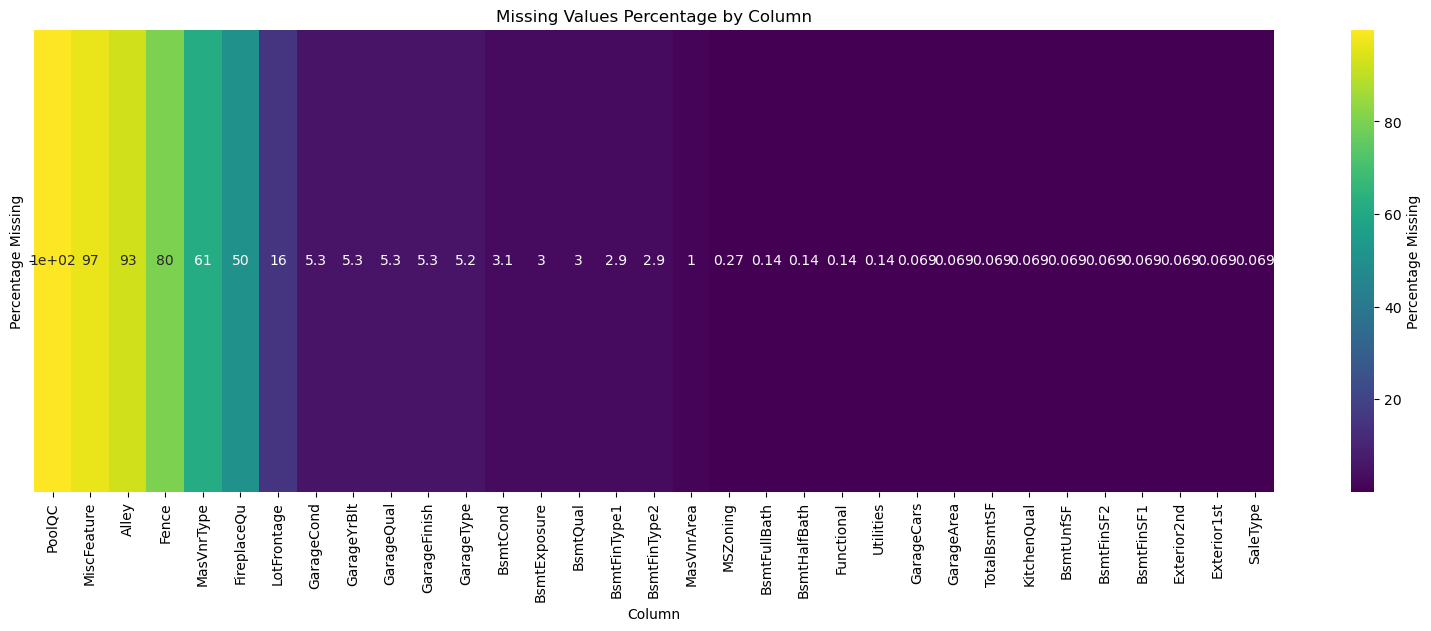

In [24]:
missing_summary_test = summarize_missing_values(test_data)
print(missing_summary_test)
plot_missing_values_summary(missing_summary_test)


In [25]:

fill_features = ['MasVnrType','Alley','Fence','PoolQC', 'FireplaceQu']
for col in fill_features:
    test_data[col] = test_data[col].fillna('NA')


Filling test missing numerical data

In [26]:
#Fill test_data null with median value
numerical_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in numerical_to_examine:
    test_data[col] = test_data[col].fillna(test_data[col].median())
test_data[numerical_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [27]:
basement_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
]

# Fill categorical basement features with 'No Basement'
for feature in basement_features[:5]:
    test_data[feature] = test_data[feature].fillna('No Basement')

# Fill numerical basement features with 0
for feature in basement_features[5:]:
    test_data[feature] = test_data[feature].fillna(0)


In [28]:
# Fill Garage with 'No Garage'
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
for feature in garage_features:
    if test_data[feature].dtype == 'object':
        test_data[feature] = test_data[feature].fillna('No Garage')
    else:
        test_data[feature] = test_data[feature].fillna(0)

In [29]:
#Filling the rest with the mode
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])

In [30]:
#Drop Id and MiscFeatures
test_id = test_data['Id'] #save Id for submission
test_data.drop('Id' , axis =1 , inplace = True)
test_data.drop('MiscFeature', axis =1, inplace = True)
print(f"Training missing values summary:\n{summarize_missing_values(test_data)}")

Training missing values summary:
Empty DataFrame
Columns: [Index, Column, Missing Values, Percentage Missing, Dtype]
Index: []


In [31]:
#Print missing values count
print('Missing test values:', test_data.isna().sum().sum())

Missing test values: 0


# EDA – Essential Data Analysis 

Now its time to analyze and visualize the data and maybe gain some insights. We'll start with the target feature

In [32]:
#Visualize the target variable
trace = go.Box(y=train_data['SalePrice'], name='Sale Price', marker=dict(color='blue'))
layout = go.Layout(title='Sale Price Distribution', height=800, width=1000)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

As we can see, our target feature ranging from 34900 to 755k but generally will be between 130k to 214k. additionaly, we can detect  many outliers at the higher range of prices, but not on the lower range.

Lets analyze how the Sale Price correlates with other features. we'll start with discrete numerical features:

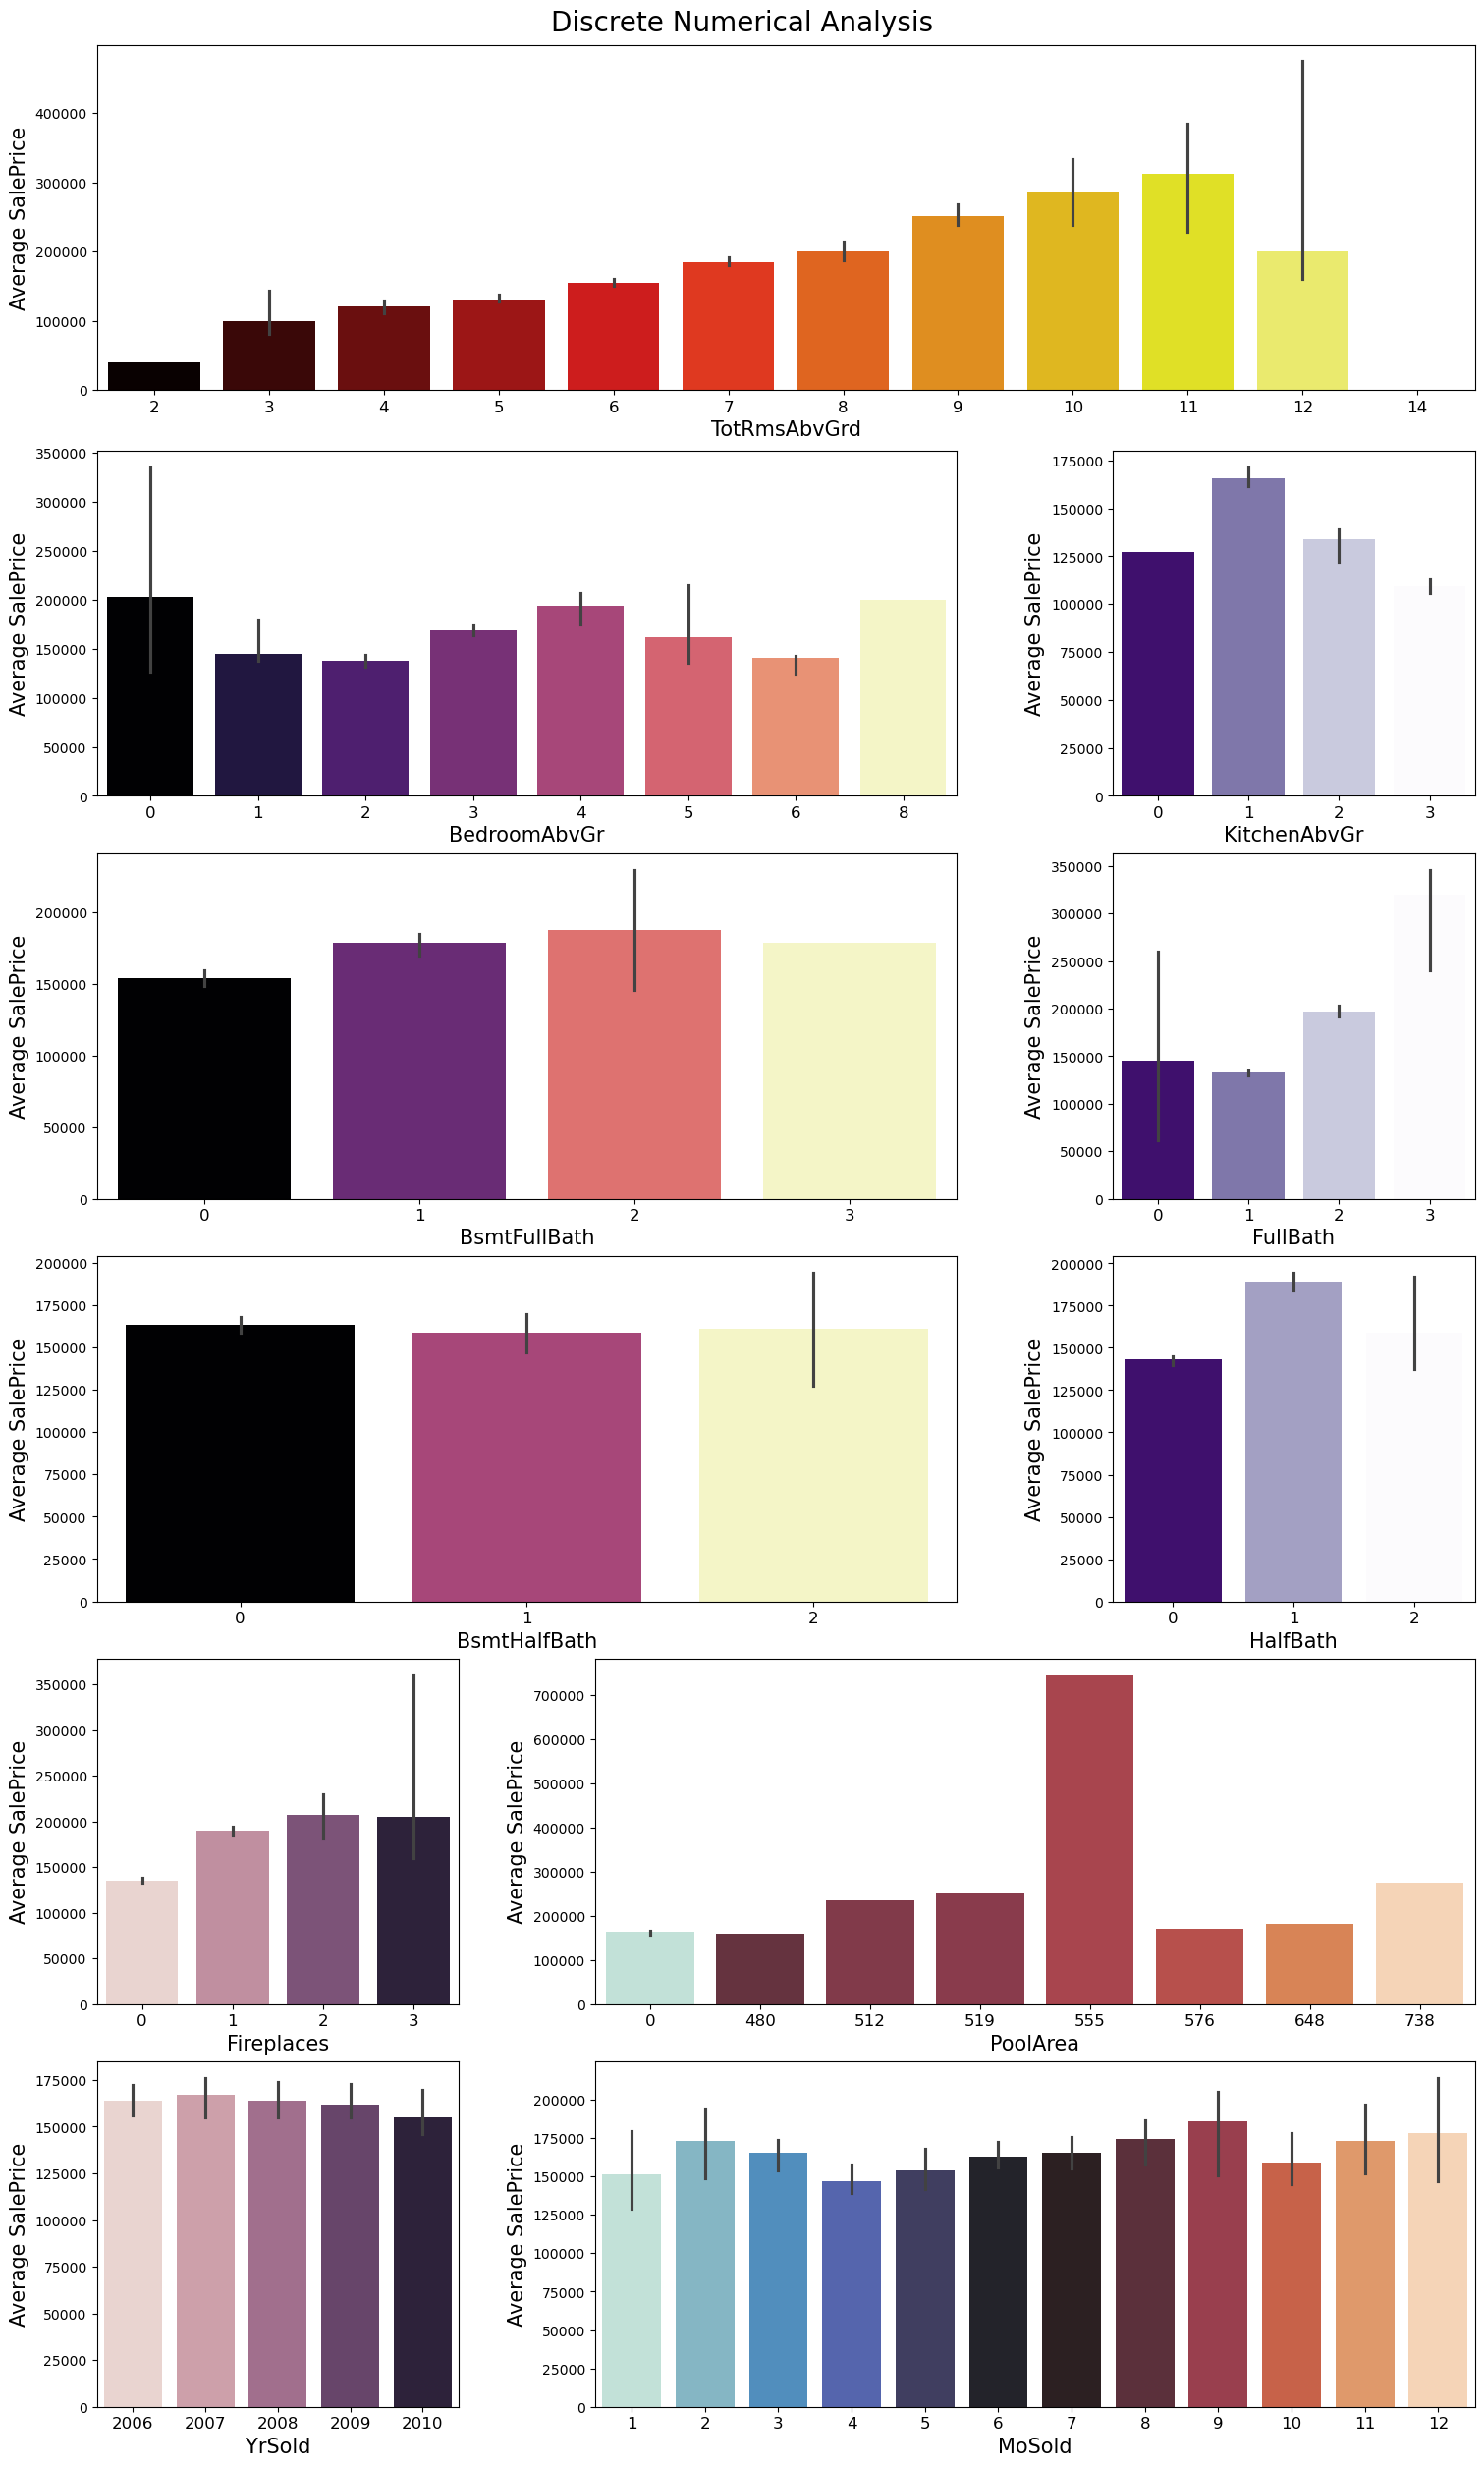

In [33]:
#Visualize Discrete Features with their average Sale Price
def plot_barplot(data, y, hue, ax, palette=None):
    sns.barplot(data=data, x=hue, y=y, hue=hue, estimator=np.median, palette=palette, ax=ax, legend=False)
    ax.set_xlabel(hue, fontsize=15)
    ax.set_ylabel(f"Average {y}", fontsize=15)
    ax.tick_params(axis='x', labelsize=12)

fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = GridSpec(6, 3, figure=fig)

# Plotting
plot_barplot(train_data, "SalePrice", "TotRmsAbvGrd", fig.add_subplot(gs[0, :]), 'hot')
plot_barplot(train_data, "SalePrice", "BedroomAbvGr", fig.add_subplot(gs[1, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "KitchenAbvGr", fig.add_subplot(gs[1, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "BsmtFullBath", fig.add_subplot(gs[2, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "FullBath", fig.add_subplot(gs[2, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "BsmtHalfBath", fig.add_subplot(gs[3, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "HalfBath", fig.add_subplot(gs[3, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "Fireplaces", fig.add_subplot(gs[4, :-2]))
plot_barplot(train_data, "SalePrice", "PoolArea", fig.add_subplot(gs[4, -2:]), 'icefire')
plot_barplot(train_data, "SalePrice", "YrSold", fig.add_subplot(gs[5, :-2]))
plot_barplot(train_data, "SalePrice", "MoSold", fig.add_subplot(gs[5, -2:]), 'icefire')

plt.suptitle("Discrete Numerical Analysis", fontsize=20)
plt.show()


- Total Rooms Above Grade : As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
- Bedroom Above Grade : Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
- Kitchen Above Grade : Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
- InBasemnt /Full bathroomsandBasement /Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
- Fireplaces : As fireplaces will increase in the house , sale price will also increase.
- PoolArea : Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
- Year Sold : The houses in our dataset were sold from year 2006.We can see a small downward slope from 2006 to 2010.
- Month Sold : There is not much to study about the effect of Month Sold on the Sale Price, though we notice a slight decrease in price in April-May.

Now well analyze the rest of numerical features

In [34]:
numeric_data = []
for col in train_data.columns:
    if train_data[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt']:
        numeric_data.append(col)
numeric_data.insert(0, 'SalePrice')

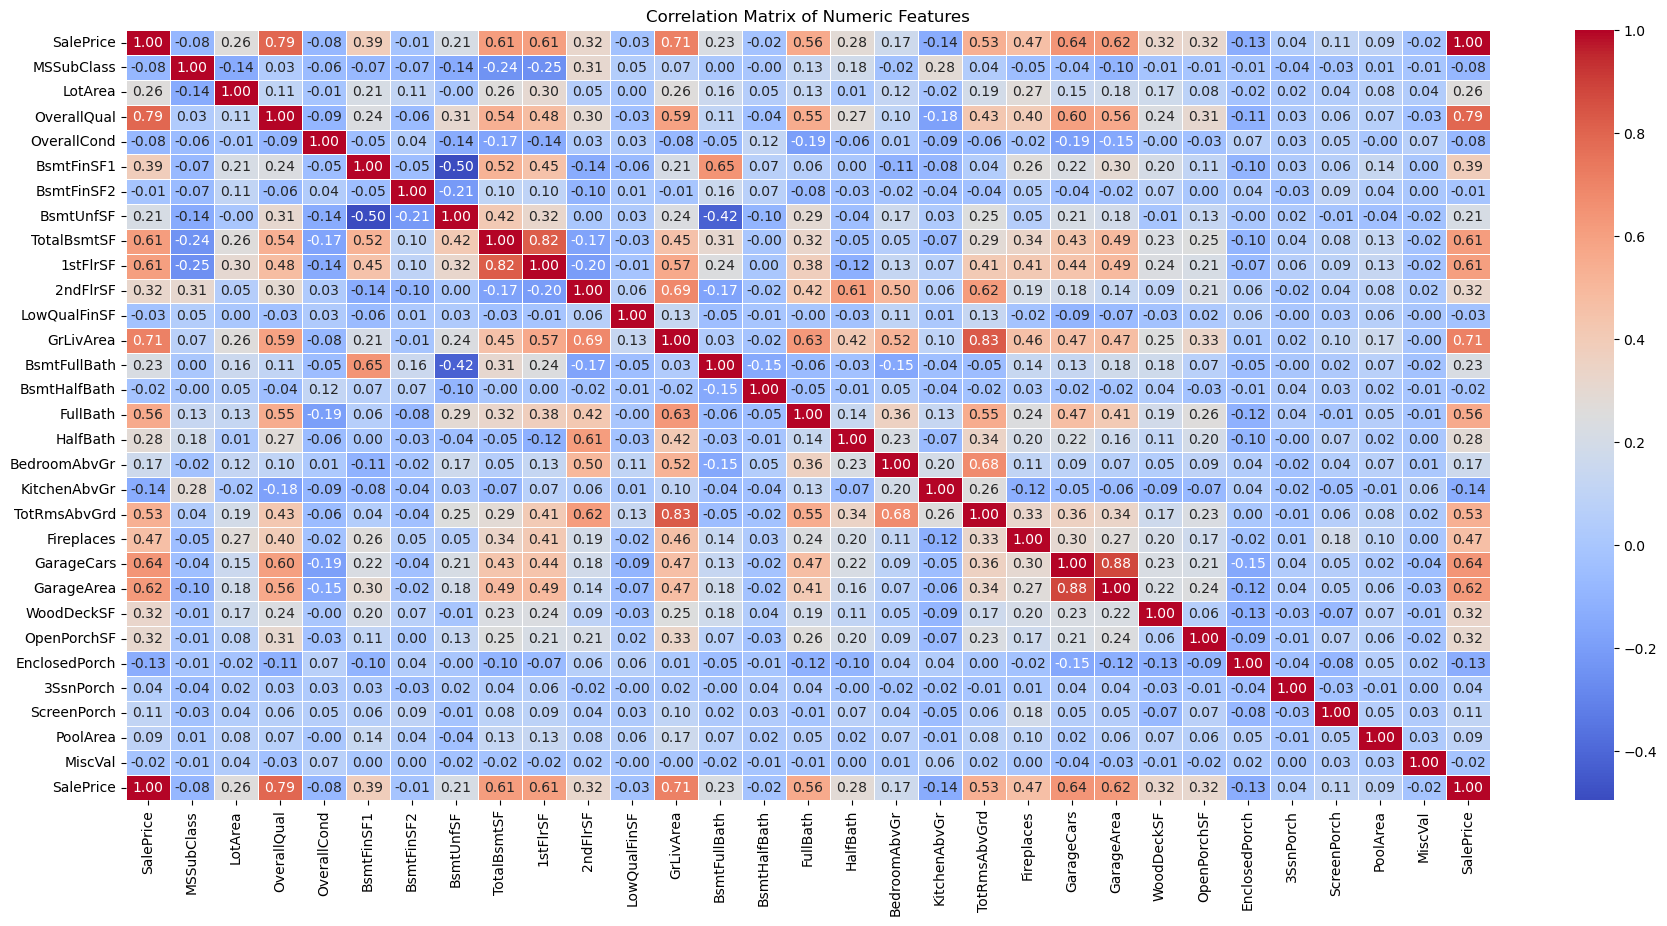

In [35]:

# Compute the correlation matrix
corr_matrix = train_data[numeric_data].corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- The features mostly correlated to the Sale Price are: OverallQual(0.79) and GrLivarea(0.71)
- GarageArea and GarageCars has 0.62 and 0.64 correlation with SalePrice
- Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
- FullBath has a positive correlation of 0.56
- We have 3 negative correlations here: EnclosedPorch, KitchenAbvGround and MiscVal

## Feature Selection and Modelling
Few pipeline steps are necessary for the feature selection and modelling:
>Encode the categorical features.<br>

>Scale the data using StandardScaler.<br>

>Perform Feature Selection using RFECV.<br>

>Hyperparameter tuning.<br>

>Finally, fitting a model on the best hyperparameters.<br>


In [36]:
# extract the categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
train_X_categorical = train_data[categorical_features]
# Split the data into target and features
X = train_data.drop(columns=['SalePrice'])
t = train_data['SalePrice']

# using the OrdinalEncoder to encode the categorical features
ord_enc = OrdinalEncoder()
categorical_encoded = ord_enc.fit_transform(train_X_categorical)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=categorical_features)

# Concatenate the encoded categorical features with the numerical features including the target
train_data_cpy = train_data.drop(columns=categorical_features)
train_data_encoded = pd.concat([train_data_cpy, categorical_encoded_df], axis=1)
X_encoded = train_data_encoded.drop(columns=['SalePrice'])
X_encoded.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,8.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,8.0,4.0


We will narrow the amount of features to use only the best features using RFECV (Recursive Feature Elimination Cross Validation)

In [37]:
#Find the best features with SgdRegressor and CV with 5 splits
X_train, X_val, y_train, y_val = train_test_split(X_encoded, t, test_size=0.2, random_state=42)

sgd = SGDRegressor(random_state=42, max_iter=1000 ,)
scaler = StandardScaler()
transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, check_inverse=False)
selector = RFECV(
    estimator=sgd,
    step=1,
    cv=5,
    n_jobs=-1,
    scoring = 'r2')

sgd_pipe = Pipeline(steps=[
                    ('scaler', scaler),
                    ('feature_selection',selector),
                    ('regression' , sgd)])

sgd_pipe.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 RFECV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
                       scoring='r2')),
                ('regression', SGDRegressor(random_state=42))])

In [38]:
sgd_preds = sgd_pipe.predict(X_val)

sgd_rmse = root_mean_squared_error(sgd_preds, y_val)
sgd_r2 = sgd_pipe.score(X_val, y_val)
selected_features_sgd = X_encoded.columns[sgd_pipe.named_steps['feature_selection'].support_]
sgd_rmsle = np.sqrt(mean_squared_log_error(y_val, sgd_preds))

print(sgd_pipe.named_steps['feature_selection'])
print(f"Selected features: {selected_features_sgd}")
print(f"SGDRegression R^2 score: {sgd_r2}")
print(f"SGDRegression RMSE: {sgd_rmse}")
print(f"SGDRegression RMSLE: {sgd_rmsle}")


RFECV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1, scoring='r2')
Selected features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'ScreenPorch',
       'PoolArea', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'KitchenQual', 'Functional', 'PoolQC'],
      dtype='object')
SGDRegression R^2 score: 0.8223522134242267
SGDRegression RMSE: 36913.635326542135
SGDRegression RMSLE: 0.19592072346021533


#### Regularization
Regularizing the data should make some improvement in the model's learning curve.
We will perform the feature selection process again based on Ridge, Lasso, and ElasticNet classifiers, and fit them to their best hyperparameters using GridSearchCV

In [39]:

lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

lasso_param_grid = {
    'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
}

ridge_param_grid = {
    'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
}

elastic_param_grid = {
    'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regression__l1_ratio': np.arange(0.40, 1.00, 0.10),
    'regression__tol': [0.0001, 0.001],
}

In [40]:
#define pipelines that handle data scaling and feature selection using different estimators
lasso_selector = RFECV(Lasso(max_iter = 1000), cv=5, n_jobs=-1)
ridge_selector = RFECV(Ridge(max_iter = 1000), cv=5, n_jobs=-1)
elastic_selector = RFECV(ElasticNet(max_iter = 1000), cv=5, n_jobs=-1)

lasso_preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', lasso_selector )  # Initial Lasso for feature selection
])
ridge_preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', ridge_selector)  # Initial Ridge for feature selection
])
elastic_preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', elastic_selector)  # Initial ElasticNet for feature selection
])

In [41]:
#define pipelines that build the models
lasso_pipe = Pipeline([
    ('preprocessing', lasso_preprocessing_pipeline),
    ('regression', lasso)
])

ridge_pipe = Pipeline([
    ('preprocessing', ridge_preprocessing_pipeline),
    ('regression', ridge)
])

elastic_pipe = Pipeline([
    ('preprocessing', elastic_preprocessing_pipeline),
    ('regression', elastic)
])

In [42]:
#perform GridSearch on each model
lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, scoring='neg_root_mean_squared_log_error', n_jobs=-1, cv=5, return_train_score=True)
ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, scoring='neg_root_mean_squared_log_error', n_jobs=-1, cv=5 , return_train_score=True)
elastic_grid = GridSearchCV(elastic_pipe, elastic_param_grid, scoring='neg_root_mean_squared_log_error', n_jobs=-1, cv=5, return_train_score=True)

In [43]:
# fit the model
lasso_grid.fit(X_train, y_train)

c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan]

c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning:

One or more of the train scores are non-finite: [nan nan nan nan nan]

c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+09, tolerance: 6.967e+08

c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+09, tolerance: 6.967e+08

c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('feature_selection',
                                                         RFECV(cv=5,
                                                               estimator=Lasso(),
                                                               n_jobs=-1))])),
                                       ('regression', Lasso())]),
             n_jobs=-1,
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True,
             scoring='neg_root_mean_squared_log_error')

In [44]:
# fit the model
ridge_grid.fit(X_train, y_train)

c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


4 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\joblib\parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\utils

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('feature_selection',
                                                         RFECV(cv=5,
                                                               estimator=Ridge(max_iter=1000),
                                                               n_jobs=-1))])),
                                       ('regression', Ridge())]),
             n_jobs=-1,
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True,
             scoring='neg_root_mean_squared_log_error')

In [45]:
# fit the model
elastic_grid.fit(X_train, y_train)


c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


18 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\joblib\parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\miniconda3\envs\env\Lib\site-packages\sklearn\ut

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('feature_selection',
                                                         RFECV(cv=5,
                                                               estimator=ElasticNet(),
                                                               n_jobs=-1))])),
                                       ('regression', ElasticNet())]),
             n_jobs=-1,
             param_grid={'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'regression__l1_ratio': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'regression__tol': [0.0001, 0.001]},
             return_train_score=True,
             scoring='neg_root_mean_squared_log_error')

## Evaluation

In [46]:
lasso_best = lasso_grid.best_estimator_
lasso_y_pred = lasso_best.predict(X_val)
lasso_r2 = lasso_best.score(X_val, y_val)
lasso_rmse = root_mean_squared_error(y_val, lasso_y_pred)
#lasso_rmsle = np.sqrt(mean_squared_log_error(y_val, lasso_y_pred))

In [60]:
ridge_best = ridge_grid.best_estimator_
ridge_y_pred = ridge_best.predict(X_val)
ridge_r2 = ridge_best.score(X_val, y_val)
ridge_rmse = root_mean_squared_error(y_val, ridge_y_pred)
#ridge_rmsle = np.sqrt(mean_squared_log_error(y_val, ridge_y_pred))


In [57]:
elastic_best = elastic_grid.best_estimator_
elastic_y_pred = elastic_best.predict(X_val)
elastic_r2 = elastic_best.score(X_val, y_val)
elastic_rmse = root_mean_squared_error(y_val, elastic_y_pred)
elastic_rmsle = np.sqrt(mean_squared_log_error(y_val, elastic_y_pred))

C:\Users\Admin\AppData\Local\Temp\ipykernel_24700\2121543911.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_24700\2121543911.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




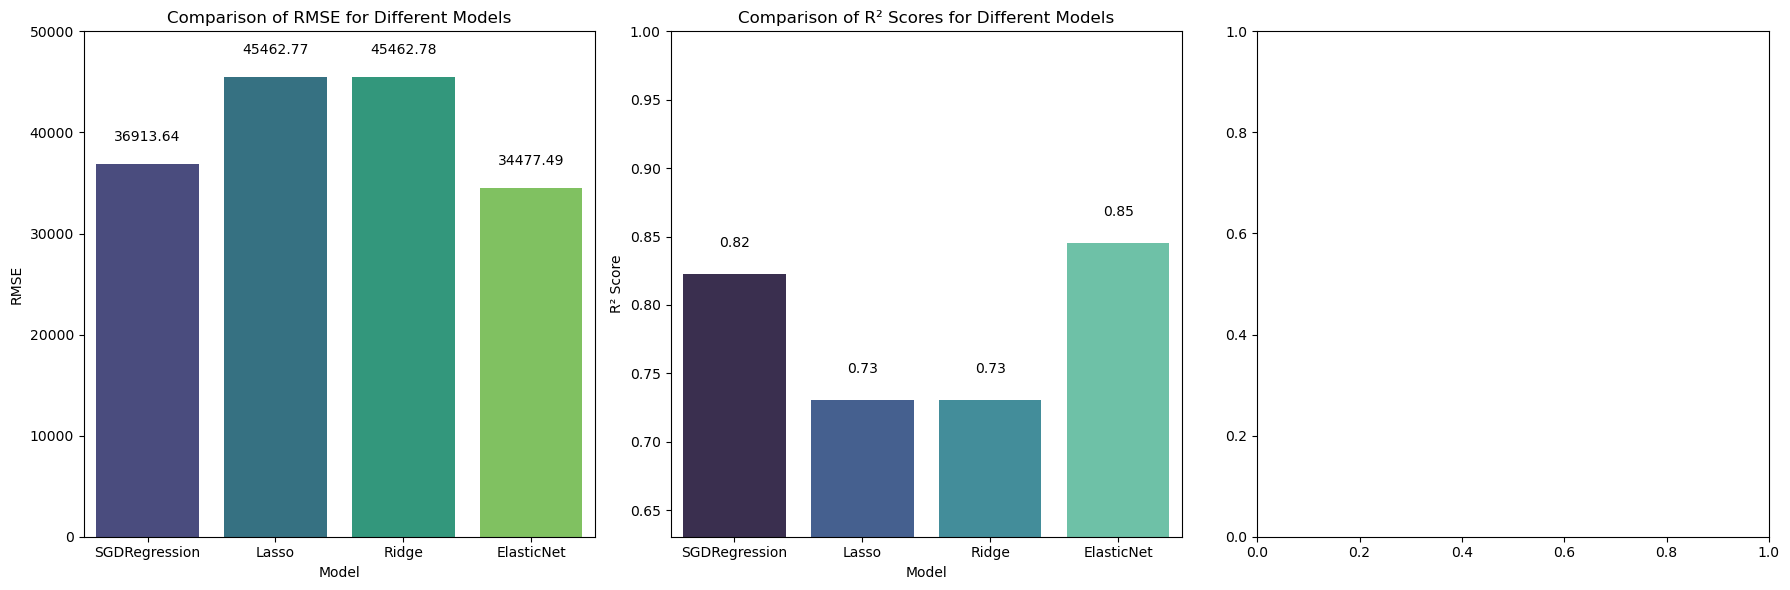

In [49]:
results = {
    'Model': ['SGDRegression', 'Lasso', 'Ridge', 'ElasticNet'],
    'RMSE': [sgd_rmse, lasso_rmse, ridge_rmse, elastic_rmse],
    'R2': [sgd_r2, lasso_r2, ridge_r2, elastic_r2],
   # 'RMSLE': [sgd_rmsle , lasso_rmsle, ridge_rmsle , elastic_rmsle]
}
results_df = pd.DataFrame(results)

# Set up the plot with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis', ax=axs[0])
axs[0].set_title('Comparison of RMSE for Different Models')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('RMSE')
axs[0].set_ylim(0, max(results_df['RMSE']) * 1.1)  # Extend the y-axis slightly
for index, value in enumerate(results_df['RMSE']):
    axs[0].text(index, value + (max(results_df['RMSE']) * 0.05), f'{value:.2f}', ha='center')

# Plot R² scores
sns.barplot(x='Model', y='R2', data=results_df, palette='mako', ax=axs[1])
axs[1].set_title('Comparison of R² Scores for Different Models')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('R² Score')
axs[1].set_ylim(min(results_df['R2']) - 0.1, 1)  # Extend the y-axis slightly
for index, value in enumerate(results_df['R2']):
    axs[1].text(index, value + 0.02, f'{value:.2f}', ha='center')

# Plot RMSLE
#sns.barplot(x='Model', y='RMSLE', data=results_df, palette='rocket', ax=axs[2])
#axs[2].set_title('Comparison of RMSLE for Different Models')
#axs[2].set_xlabel('Model')
#axs[2].set_ylabel('RMSLE')
#axs[2].set_ylim(0, max(results_df['RMSLE']) * 1.1)  # Extend the y-axis slightly
#for index, value in enumerate(results_df['RMSLE']):
#    axs[2].text(index, value + (max(results_df['RMSLE']) * 0.05), f'{value:.2f}', ha='center')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
# Function to extract GridSearchCV results
def extract_results(grid_search):
    results = grid_search.cv_results_
    params = results['params']
    mean_train_scores = results['mean_train_score']
    mean_test_scores = results['mean_test_score']
    return params, mean_train_scores, mean_test_scores

lasso_params, lasso_train_scores, lasso_test_scores = extract_results(lasso_grid)
ridge_params, ridge_train_scores, ridge_test_scores = extract_results(ridge_grid)
elastic_params, elastic_train_scores, elastic_test_scores = extract_results(elastic_grid)

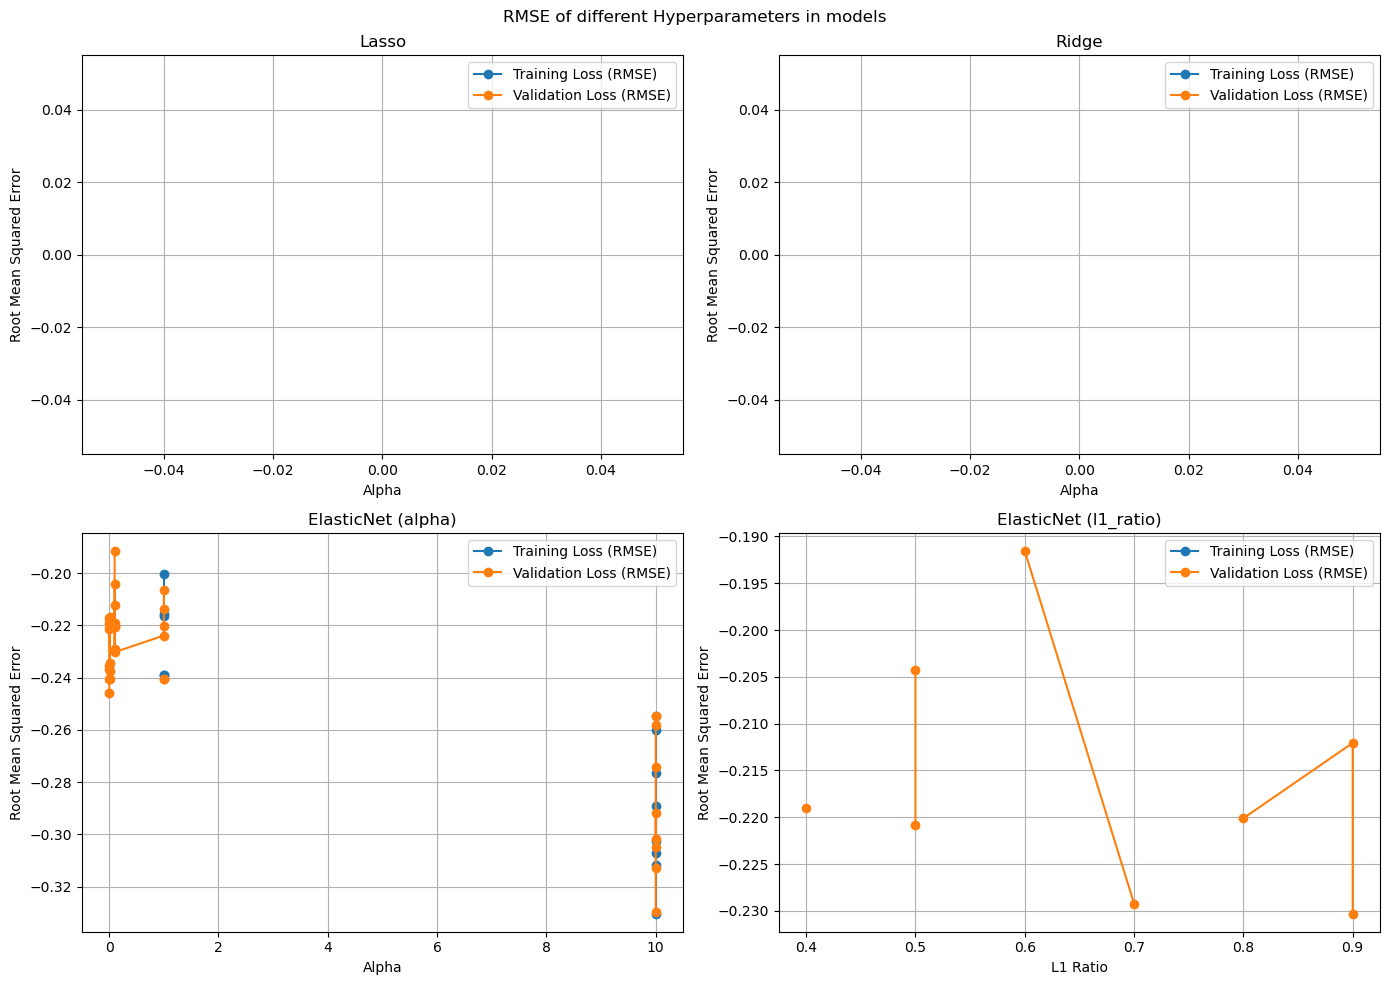

In [51]:
# Plot the hyperparameters used 
def plot_all_results(lasso_params, lasso_train_scores, lasso_test_scores,
                     ridge_params, ridge_train_scores, ridge_test_scores,
                     elastic_params, elastic_train_scores, elastic_test_scores):
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("RMSE of different Hyperparameters in models")
    # Plot Lasso results
    lasso_alphas = [param['regression__alpha'] for param in lasso_params]
    axs[0, 0].plot(lasso_alphas, lasso_train_scores, label='Training Loss (RMSE)', marker='o')
    axs[0, 0].plot(lasso_alphas, lasso_test_scores, label='Validation Loss (RMSE)', marker='o')
    axs[0, 0].set_xlabel('Alpha')
    axs[0, 0].set_ylabel('Root Mean Squared Error')
    axs[0, 0].set_title('Lasso')
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    
    # Plot Ridge results
    ridge_alphas = [param['regression__alpha'] for param in ridge_params]
    axs[0, 1].plot(ridge_alphas, ridge_train_scores, label='Training Loss (RMSE)', marker='o')
    axs[0, 1].plot(ridge_alphas, ridge_test_scores, label='Validation Loss (RMSE)', marker='o')
    axs[0, 1].set_xlabel('Alpha')
    axs[0, 1].set_ylabel('Root Mean Squared Error')
    axs[0, 1].set_title('Ridge')
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    
    # Plot ElasticNet results for alpha
    elastic_alphas = [param['regression__alpha'] for param in elastic_params if 'regression__alpha' in param]
    elastic_train_scores_alpha = [score for param, score in zip(elastic_params, elastic_train_scores) if 'regression__alpha' in param]
    elastic_test_scores_alpha = [score for param, score in zip(elastic_params, elastic_test_scores) if 'regression__alpha' in param]
    
    axs[1, 0].plot(elastic_alphas, elastic_train_scores_alpha, label='Training Loss (RMSE)', marker='o')
    axs[1, 0].plot(elastic_alphas, elastic_test_scores_alpha, label='Validation Loss (RMSE)', marker='o')
    axs[1, 0].set_xlabel('Alpha')
    axs[1, 0].set_ylabel('Root Mean Squared Error')
    axs[1, 0].set_title('ElasticNet (alpha)')
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    
    # Plot ElasticNet results for l1_ratio (filtered for a specific alpha, e.g., 0.1)
    filtered_params = [param for param in elastic_params if param['regression__alpha'] == 0.1]
    elastic_l1_ratios = [param['regression__l1_ratio'] for param in filtered_params]
    elastic_train_scores_l1 = [score for param, score in zip(elastic_params, elastic_train_scores) if param['regression__alpha'] == 0.1]
    elastic_test_scores_l1 = [score for param, score in zip(elastic_params, elastic_test_scores) if param['regression__alpha'] == 0.1]
    
    axs[1, 1].plot(elastic_l1_ratios, elastic_train_scores_l1, label='Training Loss (RMSE)', marker='o')
    axs[1, 1].plot(elastic_l1_ratios, elastic_test_scores_l1, label='Validation Loss (RMSE)', marker='o')
    axs[1, 1].set_xlabel('L1 Ratio')
    axs[1, 1].set_ylabel('Root Mean Squared Error')
    axs[1, 1].set_title('ElasticNet (l1_ratio)')
    axs[1, 1].legend()
    axs[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Extracting results
lasso_params, lasso_train_scores, lasso_test_scores = extract_results(lasso_grid)
ridge_params, ridge_train_scores, ridge_test_scores = extract_results(ridge_grid)
elastic_params, elastic_train_scores, elastic_test_scores = extract_results(elastic_grid)

# Plotting all results in a single figure
plot_all_results(lasso_params, lasso_train_scores, lasso_test_scores,
                 ridge_params, ridge_train_scores, ridge_test_scores,
                 elastic_params, elastic_train_scores, elastic_test_scores)


## Submission


In [52]:
pd.set_option('display.max_rows', None)

test_data.dtypes.to_frame()

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


In [53]:
pd.set_option('display.max_rows', None)
categorical_featuress = test_data.select_dtypes(include=['object']).columns
test_X_categorical = test_data[categorical_featuress]
test_X_categorical.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RH,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,NA,Attchd,Unf,TA,TA,Y,NA,MnPrv,WD,Normal
1,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,NA,Attchd,Unf,TA,TA,Y,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Attchd,Fin,TA,TA,Y,NA,MnPrv,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Gd,Attchd,Fin,TA,TA,Y,NA,NA,WD,Normal
4,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,NA,Attchd,RFn,TA,TA,Y,NA,NA,WD,Normal


In [54]:
# encode test data

# extract the categorical features
categorical_featuress = test_data.select_dtypes(include=['object']).columns
test_X_categorical = test_data[categorical_featuress]
# Split the data  and features

# using the OrdinalEncoder to encode the categorical features
ord_enc = OrdinalEncoder()
categorical_encoded = ord_enc.fit_transform(test_X_categorical)
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=categorical_features)

# Concatenate the encoded categorical features with the numerical features including the target
test_data_cpy = test_data.drop(columns=categorical_features)
test_data_encoded = pd.concat([test_data_cpy, categorical_encoded_df], axis=1)
test_data_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,3.0,1.0,3.0,4.0,5.0,2.0,2.0,2.0,8.0,4.0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,3.0,1.0,3.0,4.0,5.0,2.0,2.0,4.0,8.0,4.0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,5.0,1.0,0.0,4.0,5.0,2.0,2.0,2.0,8.0,4.0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,2.0,1.0,0.0,4.0,5.0,2.0,2.0,4.0,8.0,4.0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,3.0,1.0,2.0,4.0,5.0,2.0,2.0,4.0,8.0,4.0


In [68]:
submission_preds = sgd_pipe.predict(test_data_encoded)

submission_df = pd.DataFrame({
    'Id': test_id,  
    'SalePrice': submission_preds  
})
submission_df.head()

,Id,SalePrice
0,1461,189081.565112
1,1462,238378.937782
2,1463,246753.469270
3,1464,261903.117373
4,1465,264514.044287


In [69]:
submission_df.to_csv("sgd_submission.csv",index=False)